# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
units="imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=2ada6d86592db87853d7275212bae2b6&units=imperial&q='

In [6]:
#Create empty list
city_name = []
city_id = []
country = []
lat = []
lon = []
temp = []
wind = []
humidity = []
clouds = []


In [8]:
for city in cities:
    weather_info = requests.get(query_url + city).json()
    
    try:
        city_name.append(weather_info['name'])
        city_id.append(weather_info['id'])
        country.append(weather_info['sys']['country'])
        lat.append(weather_info['coord']['lat'])
        lon.append(weather_info['coord']['lon'])
        temp.append(weather_info['main']['temp'])
        wind.append(weather_info['wind']['speed'])
        humidity.append(weather_info['main']['humidity'])
        clouds.append(weather_info['clouds']['all'])
        
        
        print(f' Data retrieved for: {city}')
    except:
        
        print(f'Incomplete Data for: {city}')        

 Data retrieved for: puerto escondido
 Data retrieved for: kalevala
 Data retrieved for: hofn
Incomplete Data for: grand river south east
Incomplete Data for: barentsburg
 Data retrieved for: punta arenas
 Data retrieved for: castro
 Data retrieved for: lompoc
 Data retrieved for: atuona
 Data retrieved for: grindavik
 Data retrieved for: grenfell
 Data retrieved for: tabou
 Data retrieved for: mnogovershinnyy
 Data retrieved for: bambous virieux
 Data retrieved for: margate
 Data retrieved for: ust-kuyga
 Data retrieved for: kapaa
 Data retrieved for: rikitea
 Data retrieved for: boca do acre
 Data retrieved for: ushuaia
 Data retrieved for: geraldton
 Data retrieved for: luderitz
 Data retrieved for: bilibino
 Data retrieved for: deputatskiy
 Data retrieved for: vila franca do campo
 Data retrieved for: hilo
 Data retrieved for: busselton
 Data retrieved for: gizo
 Data retrieved for: hithadhoo
 Data retrieved for: caceres
 Data retrieved for: ustka
 Data retrieved for: manzhouli
 Da

 Data retrieved for: sistranda
 Data retrieved for: okmulgee
 Data retrieved for: itarema
 Data retrieved for: batticaloa
 Data retrieved for: dunedin
 Data retrieved for: paris
 Data retrieved for: ayia galini
 Data retrieved for: rio gallegos
 Data retrieved for: havre-saint-pierre
 Data retrieved for: maryborough
 Data retrieved for: muros
 Data retrieved for: port macquarie
 Data retrieved for: adyge-khabl
 Data retrieved for: lagoa nova
 Data retrieved for: lichinga
 Data retrieved for: norman wells
 Data retrieved for: nizhniy baskunchak
 Data retrieved for: zalantun
 Data retrieved for: lardos
 Data retrieved for: taree
 Data retrieved for: healdsburg
 Data retrieved for: longyearbyen
 Data retrieved for: hami
 Data retrieved for: meulaboh
 Data retrieved for: dingle
 Data retrieved for: kumluca
Incomplete Data for: palabuhanratu
 Data retrieved for: iqaluit
 Data retrieved for: mareeba
 Data retrieved for: nova soure
 Data retrieved for: linjiang
Incomplete Data for: babanusah


 Data retrieved for: acarau
 Data retrieved for: chacabuco
Incomplete Data for: tasbuget
 Data retrieved for: pachino
 Data retrieved for: agadir
 Data retrieved for: orikum
 Data retrieved for: khani
 Data retrieved for: churachandpur
 Data retrieved for: san carlos de bariloche
 Data retrieved for: vrangel
 Data retrieved for: murgab
 Data retrieved for: vao
 Data retrieved for: naryan-mar
 Data retrieved for: luanda
 Data retrieved for: ballina
 Data retrieved for: copacabana
 Data retrieved for: boali
 Data retrieved for: houma
 Data retrieved for: mikkeli
 Data retrieved for: nabire
 Data retrieved for: khovu-aksy
Incomplete Data for: hunza
 Data retrieved for: kramat
 Data retrieved for: kayerkan
 Data retrieved for: torrevieja
 Data retrieved for: inndyr
 Data retrieved for: ambunti
 Data retrieved for: paraiso
 Data retrieved for: cleburne
 Data retrieved for: rio grande
 Data retrieved for: muhos
 Data retrieved for: mwene-ditu
 Data retrieved for: ibra
 Data retrieved for: fa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#create an empty data Frame
weather_df = pd.DataFrame()

weather_df["City"] = city_name
weather_df["City ID"] = city_id
weather_df["Country"] = country
weather_df["Lat"] = lat
weather_df["Lon"] = lon
weather_df["Temp"] = temp
weather_df["Wind"] = wind
weather_df["Humidity"] = humidity
weather_df["Cloudiness"] = clouds
weather_df

,City,City ID,Country,Lat,Lon,Temp,Wind,Humidity,Cloudiness
0,Puerto Escondido,3520994,MX,15.8500,-97.0667,75.34,5.95,70,68
1,Kalevala,554318,RU,65.2000,31.1667,21.67,3.58,85,52
2,Hofn,2630299,IS,64.2539,-15.2082,43.41,22.82,90,100
3,Punta Arenas,3874787,CL,-53.1500,-70.9167,37.51,4.61,81,0
4,Castro,3466704,BR,-24.7911,-50.0119,59.54,5.97,98,95
...,...,...,...,...,...,...,...,...,...
611,Bonoua,2291087,CI,5.2741,-3.5950,82.02,3.58,87,100
612,Lavrentiya,4031637,RU,65.5833,-171.0000,9.23,6.26,81,25
613,Songling,1898494,CN,31.1933,120.7176,53.58,11.63,37,88
614,San Policarpo,1688696,PH,12.1791,125.5072,82.36,14.43,82,100


In [13]:
weather_df.to_csv("city_weather.csv", index=False, header = True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
humidity_df = weather_df[weather_df['Humidity']>100]
humidity_df

,City,City ID,Country,Lat,Lon,Temp,Wind,Humidity,Cloudiness


In [24]:
#Test to see that humidity_df is pulling data correctly by using a lower threshold
humidity_df = weather_df[weather_df['Humidity']>99]
humidity_df

,City,City ID,Country,Lat,Lon,Temp,Wind,Humidity,Cloudiness
32,Vaini,4032243,TO,-21.2000,-175.2000,75.36,3.44,100,90
86,Vaini,4032243,TO,-21.2000,-175.2000,75.36,3.44,100,90
121,Camopi,3382226,GF,3.1655,-52.3158,71.47,1.74,100,99
126,Palmer,4946620,US,42.1584,-72.3287,40.28,0.00,100,1
205,Coquimbo,3893629,CL,-29.9533,-71.3436,55.13,4.61,100,90
212,Saskylakh,2017155,RU,71.9167,114.0833,-19.62,4.54,100,45
235,Sola,2134814,VU,-13.8833,167.5500,77.67,0.00,100,75
306,Río Gallegos,3838859,AR,-51.6226,-69.2181,32.05,1.14,100,100
344,Dungarvan,2964528,IE,52.0881,-7.6253,56.03,8.01,100,100
390,Tendō,2110793,JP,38.3536,140.3697,59.04,13.80,100,75


In [ ]:
#  Get the indices of cities that have humidity over 100%.
#No cities > 100% humidity

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

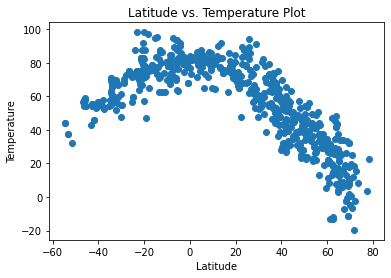

In [27]:
x_values = weather_df["Lat"]
y_values = weather_df["Temp"]

plt.scatter(x_values, y_values)
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("lat_temp.png")
plt.show()

## Latitude vs. Humidity Plot

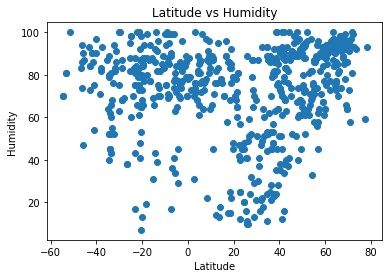

In [28]:
x_values = weather_df["Lat"]
y_values = weather_df["Humidity"]
plt.scatter(x_values, y_values)
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("lat_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

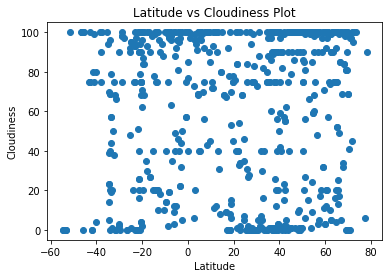

In [30]:
x_values = weather_df["Lat"]
y_values = weather_df["Cloudiness"]
plt.title("Latitude vs Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(x_values,y_values)
plt.savefig("lat_clouds.png")
plt.show()

## Latitude vs. Wind Speed Plot

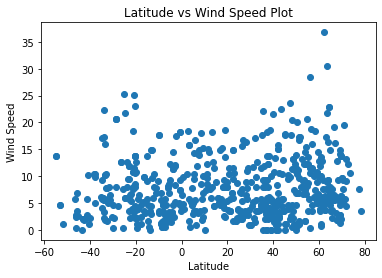

In [32]:
x_values = weather_df["Lat"]
y_values = weather_df["Wind"]
plt.title("Latitude vs Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(x_values, y_values)
plt.savefig("lat_wind.png")
plt.show()


## Linear Regression

In [37]:

northern_hemisphere = weather_df.query('Lat>0')
northern_hemisphere

,City,City ID,Country,Lat,Lon,Temp,Wind,Humidity,Cloudiness
0,Puerto Escondido,3520994,MX,15.8500,-97.0667,75.34,5.95,70,68
1,Kalevala,554318,RU,65.2000,31.1667,21.67,3.58,85,52
2,Hofn,2630299,IS,64.2539,-15.2082,43.41,22.82,90,100
5,Lompoc,5367788,US,34.6391,-120.4579,54.01,4.61,93,75
7,Grindavik,3416888,IS,63.8424,-22.4338,41.47,9.22,93,75
...,...,...,...,...,...,...,...,...,...
607,Enterprise,5503766,US,36.0252,-115.2419,62.56,5.01,25,75
611,Bonoua,2291087,CI,5.2741,-3.5950,82.02,3.58,87,100
612,Lavrentiya,4031637,RU,65.5833,-171.0000,9.23,6.26,81,25
613,Songling,1898494,CN,31.1933,120.7176,53.58,11.63,37,88


In [38]:
southern_hemisphere = weather_df.query('Lat<0')
southern_hemisphere

,City,City ID,Country,Lat,Lon,Temp,Wind,Humidity,Cloudiness
3,Punta Arenas,3874787,CL,-53.1500,-70.9167,37.51,4.61,81,0
4,Castro,3466704,BR,-24.7911,-50.0119,59.54,5.97,98,95
6,Atuona,4020109,PF,-9.8000,-139.0333,78.12,17.58,75,14
8,Grenfell,2164457,AU,-33.9000,148.1667,65.62,5.64,45,69
11,Bambous Virieux,1106677,MU,-20.3428,57.7575,82.65,13.80,65,75
...,...,...,...,...,...,...,...,...,...
605,Quatre Cocos,1106643,MU,-20.2078,57.7625,82.09,10.60,73,71
608,Conceição do Araguaia,3401845,BR,-8.2578,-49.2647,73.65,3.56,95,100
609,Kirakira,2178753,SB,-10.4544,161.9205,80.73,9.04,83,10
610,Palmerston North,2185018,NZ,-40.3500,175.6167,56.59,1.01,90,4


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

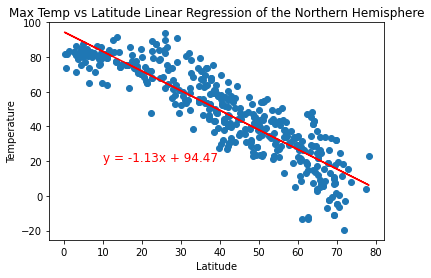

1.223851735868663e-144


In [60]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10, 20),fontsize=12, color="red")
plt.scatter(x_values, y_values)
plt.title("Max Temp vs Latitude Linear Regression of the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("NH Temp vs Lat Linear Regression.png")
plt.show()
print(pvalue)

The plot shows a strong correlation between temperature and latitude. Temperatures decline for cities as distance from the equator increases

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

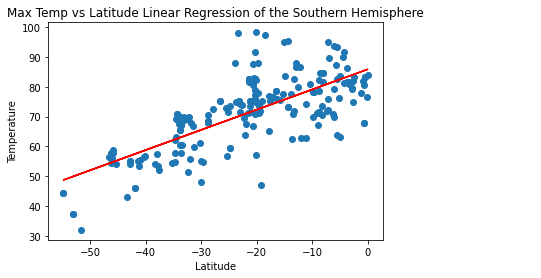

2.131524273681915e-34
y = 0.68x + 85.84


In [63]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10, 20),fontsize=12, color="red")
plt.scatter(x_values, y_values)
plt.title("Max Temp vs Latitude Linear Regression of the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("SH Temp vs Lat Linear Regression.png")
plt.show()
print(pvalue)
print(line_eq)

The plot shows a correlation between temperature and latitude. Temperatures decline for cities as distance from the equator increases

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

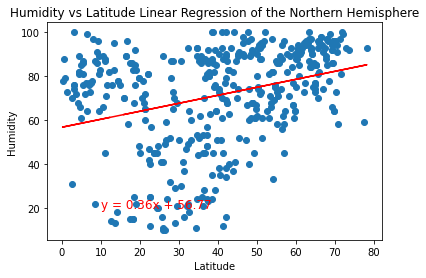

6.263112691574575e-11
y = 0.36x + 56.77


In [62]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10, 20),fontsize=12, color="red")
plt.scatter(x_values, y_values)
plt.title("Humidity vs Latitude Linear Regression of the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("NH Humidity vs Lat Linear Regression.png")
plt.show()
print(pvalue)
print(line_eq)

The plot shows a correlation between humidity and latitude in the northern hemisphere. Humidity rises for cities as distance from the equator increases. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

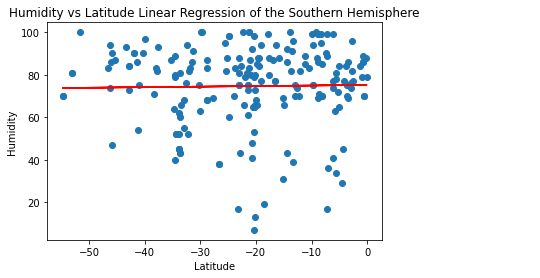

0.7977394321437767
y = 0.03x + 75.19


In [70]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10, 20),fontsize=12, color="red")
plt.scatter(x_values, y_values)
plt.title("Humidity vs Latitude Linear Regression of the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("SH Humidity vs Lat Linear Regression.png")
plt.show()
print(pvalue)
print(line_eq)

The plot shows no correlation between humidity and latitude in the southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

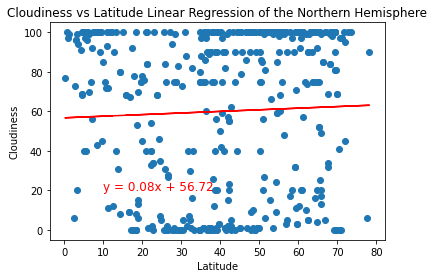

0.4045581117915795
y = 0.08x + 56.72


In [64]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10, 20),fontsize=12, color="red")
plt.scatter(x_values, y_values)
plt.title("Cloudiness vs Latitude Linear Regression of the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("NH Clouds vs Lat Linear Regression.png")
plt.show()
print(pvalue)
print(line_eq)

The plot shows no significant correlation between loudiness and latitude in the northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

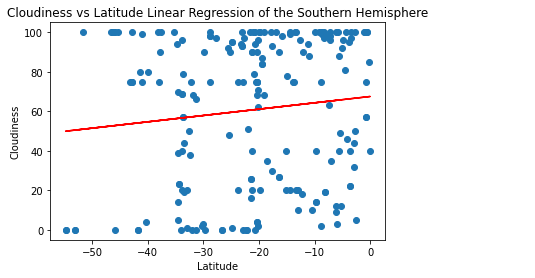

0.10412686731617331
y = 0.32x + 67.5


In [68]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10, 20),fontsize=12, color="red")
plt.scatter(x_values, y_values)
plt.title("Cloudiness vs Latitude Linear Regression of the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("SH Clouds vs Lat Linear Regression.png")
plt.show()
print(pvalue)
print(line_eq)

The plot shows no significant correlation between loudiness and latitude in the southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

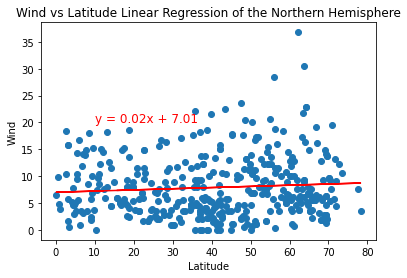

0.11131455949808018
y = 0.02x + 7.01


In [66]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10, 20),fontsize=12, color="red")
plt.scatter(x_values, y_values)
plt.title("Wind vs Latitude Linear Regression of the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.savefig("NH Wind vs Lat Linear Regression.png")
plt.show()
print(pvalue)
print(line_eq)

The plot shows no correlation between wind speed and latitude in the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

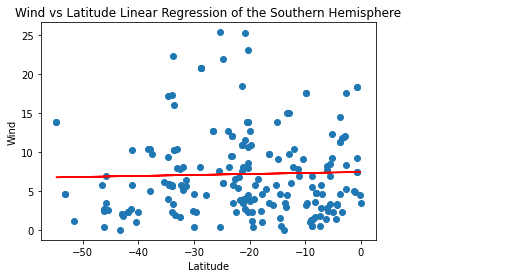

0.6601757753604898
y = 0.01x + 7.42


In [69]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10, 20),fontsize=12, color="red")
plt.scatter(x_values, y_values)
plt.title("Wind vs Latitude Linear Regression of the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.savefig("SH Wind vs Lat Linear Regression.png")
plt.show()
print(pvalue)
print(line_eq)

The plot shows no correlation between wind speed and latitude in the southern hemisphere